In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, io, filters, util, color
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import img_as_ubyte
from sklearn.metrics import accuracy_score

import os


0


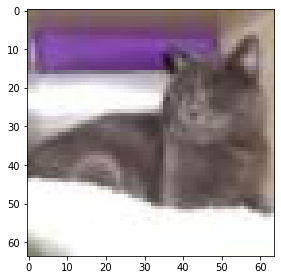

In [2]:
with h5py.File('c-d-ds-small.hdf5', 'r') as f:
#with h5py.File('c-d-ds.hdf5', 'r') as f:
    X_train_org = f['X_train'][:,:,:,:]
    y_train_org = f['y_train'][:]
    X_test_org =  f['X_test'][:,:,:,:]
    y_test_org =  f['y_test'][:]

io.imshow(X_train_org[10,:,:,:])    
print(y_train_org[10])


In [3]:
y_train = np.expand_dims(y_train_org, axis=1)
X_train = X_train_org.reshape(X_train_org.shape[0], -1) / 256

y_test = np.expand_dims(y_test_org, axis=1)
X_test = X_test_org.reshape(X_test_org.shape[0], -1) / 256

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1000, 12288), (1000, 1), (200, 12288), (200, 1))

## Датасеты готовы, делаем модель

In [4]:
# вспомогательные функции
def relu(X):
    return np.maximum(0, X)

def relu_der(X):
    return np.divide(np.maximum(0, X) / X)

def sigmoid(X):
    Y = 1./ (1 + np.exp(-X))
    return Y
    
def loss(y, y_hat):
    return -(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))

def L(y, y_hat):
    #print("y.shape=", y.shape, "A.shape=", y_hat.shape)
    #print("Loss=", np.sum(loss(y, y_hat)))
    return np.sum(loss(y, y_hat))

## Просто логистическая регрессия. Тупо


In [7]:
class LogisticRegression():
    
    def __init__(self):
        self.losses = []
    
    def _init_params(self, X_shape):
        self.W = np.random.randn(1, X_shape[1]) *.05
        self.b = np.zeros((1, 1))
        
    def _update_params(self, dW, db, lr):
        #print(dW[0,:10])
        self.W = self.W - lr * dW
        self.b = self.b - lr * db
        
    def _forward_pass(self, X):
        Z = np.dot(self.W, X.T) + self.b
        A = 1./ (1 + np.exp(-Z))
        return A, Z
    
    def _backward_pass(self, A, y, X):
        #print("A.shape = ", A.shape, " y.shape=", y.shape)
        dW = 1/A.shape[1]*np.dot((A - y), X)
        db = 1/A.shape[1]*np.sum(A - y)
        #print("dW.shape = ", dW.shape, " db.shape=", db.shape)
        return dW, db
    
    
    def fit(self, X, y, iters=10000, lr=0.0075):
        self._init_params(X.shape)

        for i in range(iters):
            A, Z = self._forward_pass(X)
            l = L(y, A)
            self.losses.append(l)
            if i % 100 == 0:
                print("iter: ", i, " loss: ", l, " acc:", 
                      accuracy_score(y.reshape(y.shape[1],), np.round(A.reshape(A.shape[1], ))))
            dW, db = self._backward_pass(A, y, X)
            self._update_params(dW, db, lr)
       
    
    def predict(self, X):
        return 1/(1+ np.exp(- (np.dot(self.W, X.T) + self.b)))
        

In [8]:
LR = LogisticRegression()

In [9]:
LR.fit(X_train, y_train.T)

iter:  0  loss:  1213.4602560587969  acc: 0.495
iter:  100  loss:  1955.897322480766  acc: 0.5
iter:  200  loss:  1804.8342721564263  acc: 0.507
iter:  300  loss:  1715.642113711522  acc: 0.518
iter:  400  loss:  1650.6323485925054  acc: 0.522
iter:  500  loss:  1599.0055937160864  acc: 0.53
iter:  600  loss:  1555.534534399591  acc: 0.535
iter:  700  loss:  1517.4592728716948  acc: 0.544
iter:  800  loss:  1483.1309576028048  acc: 0.545
iter:  900  loss:  1451.4548801785422  acc: 0.549
iter:  1000  loss:  1421.694333793202  acc: 0.553
iter:  1100  loss:  1393.3707799418216  acc: 0.559
iter:  1200  loss:  1366.1920813700294  acc: 0.561
iter:  1300  loss:  1339.993660179093  acc: 0.564
iter:  1400  loss:  1314.6881481929177  acc: 0.572
iter:  1500  loss:  1290.225519358416  acc: 0.578
iter:  1600  loss:  1266.5670155787868  acc: 0.584
iter:  1700  loss:  1243.6724755957962  acc: 0.589
iter:  1800  loss:  1221.4969937457167  acc: 0.591
iter:  1900  loss:  1199.9921499951133  acc: 0.594
i

In [10]:
y_hat = LR.predict(X_test) 
y_hat = np.round(y_hat.reshape(y_hat.shape[1],))

In [11]:
y_hat

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.])

In [12]:
y_hat.shape, y_test.reshape(y_test.shape[0], ).shape

((200,), (200,))

In [13]:
accuracy_score(y_test, y_hat)

0.52

## Модель просто не тянет это поднять